# PROJECT NAME :- INSURANCE COST PREDICTION


# OBJECTIVE

* We have the insurance dataset.With the help of the dataset we have to find out the predicted value of the cost or the charges with the help of machine learning.We will use several machine learning technique to find out the predicted value and will conclude which one of the machine learning algorithm fits the best in this.

# ALGORITHMS USED IN THIS PROJECT FOR PREDICTION

* Linear Regression

* Random Forest

* Gradient Boosting

* K Nearest Neighbour

* Ada Boost Regressor


# Exploratory Data Analysis

In [91]:
# importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# importing the dataset
data=pd.read_csv('insurance.csv')

In [93]:
# checking the top five rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
# checking the number of rows and columns
data.shape

(1338, 7)

- So here the output 1338 represents the number of rows and output 7 represents the number of columns.

In [95]:
# getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# DATA SET DESCRIPTION

__COLUMNS DETAILS__
- age     : age of primary beneficiary 
- sex     : insurance contractor gender, female, male 
- bmi     : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
            objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
- children: Number of children covered by health insurance / Number of dependents
- smoker  : Smoking
- region  : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance

__CATEGORICAL COLUMNS__ 

- sex

- smoker

- region


__NUMERICAL COLUMNS__

- age

- bmi

- children

- charges
    
__TARGET COLUMN__ = "__charges__"    

# DATA CLEANING

In [96]:
# checking the duplicate columns
data.duplicated().sum()

1

Here value returned as 1 means we have one duplicate value.

In [97]:
# Checking for the row which is having the duplicate row
duplicate=data[data.duplicated(keep='first')]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [98]:
duplicate=data[data.duplicated(keep='last')]
duplicate

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


So here row __581__ and row __195__ have duplicate values.

In [99]:
# Dropping the duplicate row
data=data.drop_duplicates()

In [100]:
data.shape

(1337, 7)

As you can see number of row changed to 1337 from 1338 which means we have successfully deleted the duplicate rows.

In [101]:
# checking null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As we can see the output of every column showing 0 which means we have __no__ null values.

In [102]:
# Statistical measure of the dataset
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


It shows the count, mean, standard deviation,minimum value,maximum value and the 3 percentages of the numerical columns i.e 25%,50%,75%. The percentages here means the percentage which are less than the value shown in column. For example, For 25% of column "age" means that the 25% values are lesser than 27.000000.

# Checking The Outliers

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

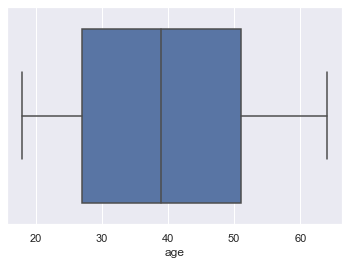

In [103]:
# checking outliers for the age column
sns.boxplot(data.age)

__Insights__ :- There are no outliers.

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

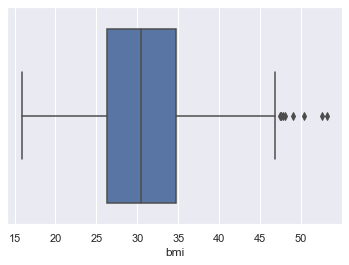

In [104]:
#checking outliers for bmi column
sns.boxplot(data.bmi)

There are few outliers present here.

In [105]:
data.describe().bmi

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

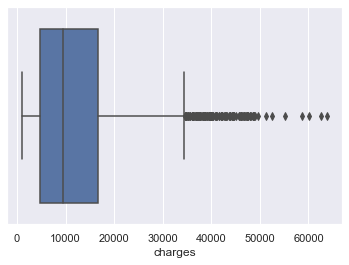

In [106]:
# checking outliers for charges column
sns.boxplot(data.charges)

In [107]:
data.describe().charges

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

# Vizualization of the columns

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


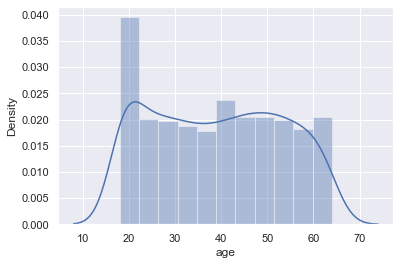

In [108]:
# Distribution of age column
sns.set()
sns.distplot(data.age)
plt.show()

Data of age column is distributed nornally.

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


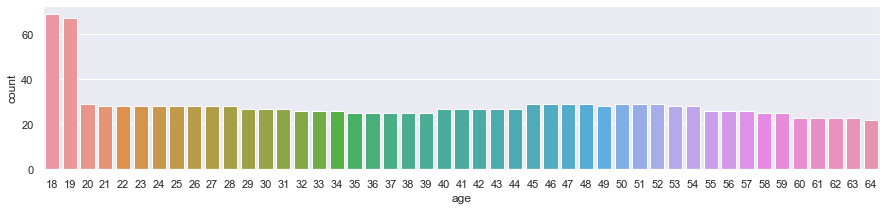

In [109]:
# Vizualizing age column
plt.figure(figsize=(15,3))
sns.countplot(data.age)
plt.show()

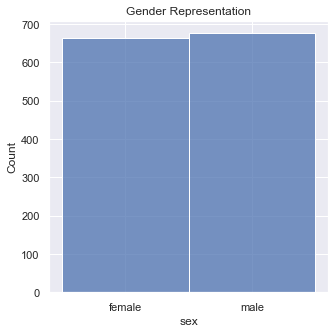

In [110]:
# Vizualizing sex column
plt.figure(figsize=(5,5))
plt.title("Gender Representation")
sns.histplot(data.sex)
plt.show()

In [111]:
#counting the number of males and females
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

Here number of males are 675 and number of females are 662.

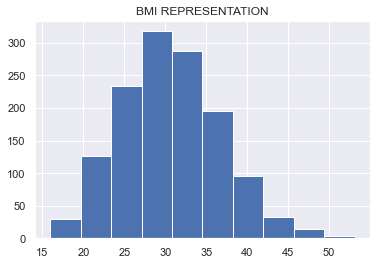

In [112]:
# Vizualizing bmi column
plt.hist(data.bmi)
plt.title("BMI REPRESENTATION")
plt.show()

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


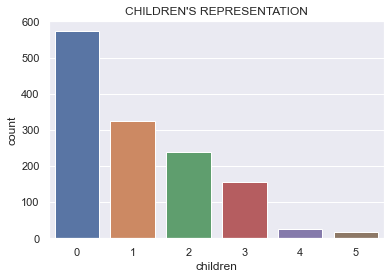

In [113]:
# Vizualizing children column
sns.countplot(data.children)
plt.title("CHILDREN'S REPRESENTATION")
plt.show()

In [114]:
# counting number of children
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Here 573 people have no children, 324 people have 1 children, 240 people have 2 children, 157 people have 3 children, 25 people have 4 children and 18 people have 5 children.

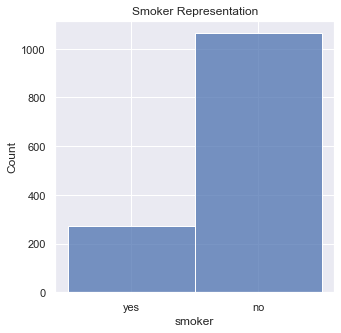

In [115]:
# Vizualizing smoker column
plt.figure(figsize=(5,5))
plt.title("Smoker Representation")
sns.histplot(data.smoker)
plt.show()

By seeing this we can understand that majority of people are not smokers.

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


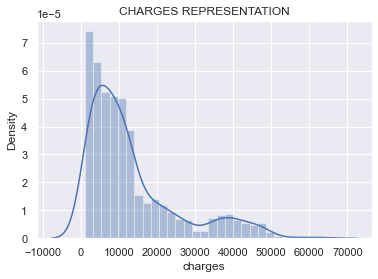

<Figure size 1440x720 with 0 Axes>

In [116]:
# Vizualization of charges plot
sns.distplot(data.charges)
plt.title("CHARGES REPRESENTATION")
plt.figure(figsize=(20,10))
plt.show()

Here in this distribution we can see that the it is a right skewed.

# Plotting "charges" column with other columns

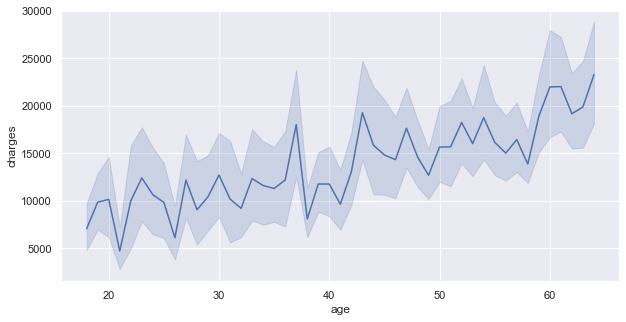

In [117]:
# Plotting the graph between charges and age column
plt.figure(figsize=(10,5))
sns.lineplot(x='age',y='charges',data=data)
plt.show()

- This plot shows that number of age is increasing, so as the charges.

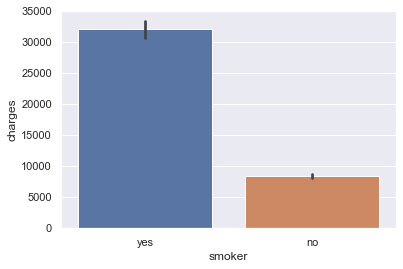

<Figure size 720x360 with 0 Axes>

In [118]:
# Plot between smoker and charges
sns.barplot(x='smoker',y='charges',data=data)
plt.figure(figsize=(10,5))
plt.show()

- We can analyse here in this that maximum number of people who are smoker have higher charges compared to non smokers.

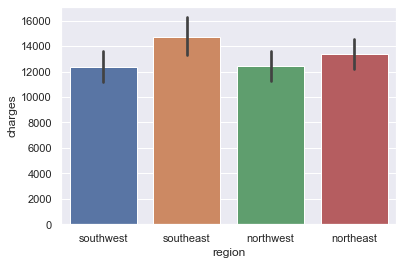

<Figure size 720x360 with 0 Axes>

In [119]:
# plotting between charges and region columns
sns.barplot(x='region',y='charges',data=data)
plt.figure(figsize=(10,5))
plt.show()

As we can see, __southeast__ region people have highest medical expenses,then __northeast__ people have second highest medical expenses. __Northweat__ and __Southwest__ region people have same expenses.

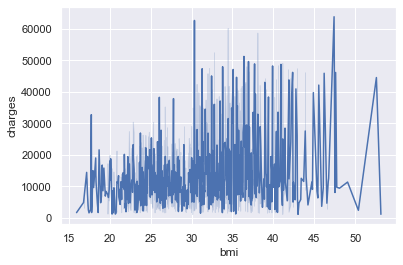

<Figure size 1080x360 with 0 Axes>

In [120]:
# plotting between bmi and charges columns
sns.lineplot(x='bmi',y='charges',data=data)
plt.figure(figsize=(15,5))
plt.show()

It's very difficult to verify but bmi value of 30 and approx 46.5 have highest cost charges.

# DATA PREPROCESSING



# Encoding The Categorical Columns

The purpose of doing this is to convert the string value that is present on categorical columns to numerical value.

In [121]:
#encoding sex column
data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [122]:
#encoding smoker column
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [123]:
#encoding region column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [124]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


- As we can see, categorical values successfully got encoded to numerical values.

# Splitting the Features and Target

In [125]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [126]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [127]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

- So we have successfully splitted the feature and target column

# Splitting the data into training data and testing data

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [129]:
#checking rows and columns of X
X.shape

(1337, 6)

In [130]:
#checking rows and columns of X_train
X_train.shape

(1069, 6)

In [131]:
#checking rows and columns of X_test
X_test.shape

(268, 6)

# Normalizing The Data

In [132]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [133]:
X_train

array([[-0.17268776, -0.98976241,  2.62951167,  1.58413201, -0.50321359,
        -1.29167637],
       [-0.17268776, -0.98976241,  0.0345788 ,  1.58413201, -0.50321359,
         1.36882852],
       [ 0.68493463, -0.98976241,  0.03872274, -0.91479143,  1.98722774,
        -0.4048414 ],
       ...,
       [ 1.54255702, -0.98976241,  2.11069085, -0.91479143, -0.50321359,
        -0.4048414 ],
       [ 0.82787169,  1.01034348, -0.80664025, -0.08181695, -0.50321359,
        -0.4048414 ],
       [ 0.6134661 ,  1.01034348,  0.97939626, -0.91479143, -0.50321359,
         1.36882852]])

In [134]:
X_test

array([[-1.08800391, -0.99256495, -1.07161079, -0.8876449 , -0.52553827,
         0.4844368 ],
       [ 1.16579356,  1.00749074, -0.12936895, -0.8876449 , -0.52553827,
         0.4844368 ],
       [ 0.81363771, -0.99256495, -0.50327444, -0.0701575 , -0.52553827,
         0.4844368 ],
       ...,
       [ 1.37708708,  1.00749074,  0.27444898, -0.0701575 , -0.52553827,
         0.4844368 ],
       [ 0.67277537, -0.99256495,  1.04508788,  0.7473299 , -0.52553827,
        -1.27000998],
       [-1.3697286 ,  1.00749074,  1.41112168, -0.0701575 , -0.52553827,
         1.36166018]])

# 1. Applying Linear Regression Algorithm

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
#loading the linear regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [137]:
#prediction of testing data
y_predict1=lr.predict(X_test)

In [138]:
##Getting R squared value for testing data
from sklearn import metrics
r2=metrics.r2_score(Y_test,y_predict1)

In [139]:
r2

0.7157747915849079

# 2. Applying Random Forest Algorithm

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [142]:
# Predicting the testing data
y_predict2=rf.predict(X_test)

In [143]:
#Checking the R Square value for testing data
from sklearn import metrics
r_test=metrics.r2_score(Y_test,y_predict2)

In [144]:
r_test

0.8257478923713442

# 3. Applying Gradient Boosting Algorithm

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
gr=GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gr.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2)

In [147]:
#prediction of testing data
y_predict3=gr.predict(X_test)

In [148]:
#checking R Squared value for testing data
r3_test=metrics.r2_score(Y_test,y_predict3)

In [149]:
r3_test

0.8501202195818373

# 4. Applying K Nearest Neighbour Algorithm

In [150]:
from sklearn.neighbors import KNeighborsRegressor

In [151]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=10)

In [152]:
#prediction of testing data
y_predict4=knn.predict(X_test)

In [153]:
#checking R Squared value for testing data
r4_test=metrics.r2_score(Y_test,y_predict4)

In [154]:
r4_test

0.7842029970113278

# 5. Applying Ada Boost Regressor Algorithm

In [155]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_train,Y_train)

AdaBoostRegressor(learning_rate=0.01)

In [156]:
#checking r sqaured value for adaboostregressor
y_pred4 = ada.predict(X_test)
from sklearn.metrics import r2_score
r5 = r2_score(Y_test,y_pred4)
r5

0.8460038735887385

In [157]:
# R squre value Results
metric_results= {'Model': ['LinearRegression','Random Forest','Gradient Boosting','KNeighbors','AdaBoost'], 'R Square': [r2, r_test, r3_test,r4_test,r5]}
                
metrics=pd.DataFrame(metric_results)
metrics

,Model,R Square
0,LinearRegression,0.715775
1,Random Forest,0.825748
2,Gradient Boosting,0.850120
3,KNeighbors,0.784203
4,AdaBoost,0.846004


Here __Linear Regression__ have the __lowest__ r sqaured value with the 71.57% accuracy of all 5 and __Gradient Boosting__ have __hightest__ r squared value with the accuracy of almost 85%.

# Creating the new dataframe of the predicted values of the charges column 

Here, we are creating the new dataframe to compare the predicted values of the target columns i.e "charges" by creating the dictionary of predicted values with the algortihms that we used.

In [158]:
df=pd.DataFrame({'Actual':Y_test,'lr':y_predict1,'rf':y_predict2,'gr':y_predict3,'knn':y_predict4,'ada':y_pred4})

In [159]:
df

,Actual,lr,rf,gr,knn,ada
17,2395.17155,1531.705687,3997.267291,5086.135918,2023.278280,6162.191656
1091,11286.53870,11611.739426,12773.653358,12323.609113,13283.450126,12906.594536
273,9617.66245,10164.893975,13441.798468,10929.811812,11818.497278,11597.861037
270,1719.43630,2422.750781,2182.632687,3126.461377,4825.308645,3489.720365
874,8891.13950,8239.854941,9505.815292,9446.490304,10256.595243,10736.971570
...,...,...,...,...,...,...
232,1727.78500,-1288.413830,2148.320860,1714.391480,2356.052310,3429.505113
323,11566.30055,15377.123065,16005.698506,13590.641071,13291.619744,12906.594536
1192,13019.16105,13802.391618,14362.009401,15512.134268,12199.748525,14910.367128
1066,8978.18510,13123.795799,9784.939004,10877.651258,10406.176255,11597.861037


- As we can see here it's quite hard to figure out that out of the above algorithms, which one is better so we have to create the plot to vizualize this.

# Comparing Performance Visually

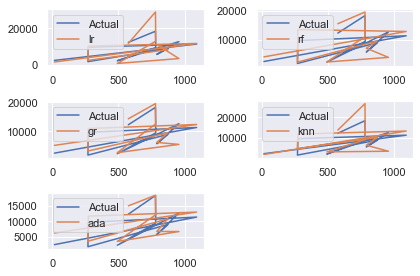

In [160]:
plt.subplot(321)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(322)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(323)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['gr'].iloc[0:11],label='gr')
plt.legend()


plt.subplot(324)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['knn'].iloc[0:11],label='knn')
plt.legend()

plt.subplot(325)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['ada'].iloc[0:11],label='ada')
plt.legend()

plt.tight_layout()




Here in this plot rf,gr and ada plots are quite same. But __Gradient Boosting__ has slightly better plot compared to the other two. 

# Figuring out mean absolute errors

In [161]:
from sklearn.metrics import mean_absolute_error

In [162]:
S1=mean_absolute_error(Y_test,y_predict1)
S2=mean_absolute_error(Y_test,y_predict2)
S3=mean_absolute_error(Y_test,y_predict3)
S4=mean_absolute_error(Y_test,y_predict4)
S5=mean_absolute_error(Y_test,y_pred4)

In [163]:
metric_results1= {'Model': ['LinearRegression','Random Forest','Gradient Boosting','KNeighbors','AdaBoost'], 'Absolute Mean Error': [S1,S2,S3,S4,S5]}
                
m=pd.DataFrame(metric_results1)
m

,Model,Absolute Mean Error
0,LinearRegression,4452.762710
1,Random Forest,2934.921577
2,Gradient Boosting,2682.748799
3,KNeighbors,3378.778501
4,AdaBoost,3018.713198


* s1 is for __linear regression__


* s2 is for __random forest algorithm__


* s3 is for __gradient bossting__ 


* s4 is for __knn nearest neighbour__


* s5 is for __ada boosting__


So after figuring out the absolute mean error, __Gradient Boosting Algorithm__ have least value compared to other 4 algorithms and hense it is the best among all 5 algorithms

# Final Algorithm we select for prediction

After comparing the 5 algorithms via plot and also checking the r squared value as well as absolute mean errror. We came to the conclusion that __Gradient Boosting Algorithm__ is the best algorithm out of 5 that we used above for the cost prediction.

# Predicting Charges For New Customer

In [164]:
d = {'age':34,'sex':1,'bmi':31.92,'children':1,'smoker':1,'region':2}
df1=pd.DataFrame(d,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,34,1,31.92,1,1,2


In [165]:
new_predict=gr.predict(df1)
print(new_predict)

[60078.41899941]


C:\Users\Priya\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


- So the predicted charges for the data "d" is __38470.68129873__

# Saving The Model

In [166]:
import pickle

In [167]:
filename = 'trained_model.sav'
pickle.dump(gr,open(filename,'wb'))

In [168]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [169]:
#Simply Checking the prediction of one row
input_data = (33,0,22.705,0,0,3)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[19466.58439044]


Actual value is 21984.47061, which is quite close to the predicted value.